# PRÁCTICA 2 TID: AGRUPAMIENTO
## Raúl González Acosta ([alu0101543529](mailto:alu0101543529@ull.edu.es))
---

## Preparación del entorno

En primer lugar, **cargamos las librerías** que vamos a utilizar a lo largo de todo el cuaderno.
- `pandas`: para procesar los datos desde un archivo csv.
- `numpy`: para el manejo de arrays y operaciones matemáticas.
- `matplotlib`: para la generación de gráficos.
- `seaborn`: para la generación de gráficos interactivos.
- `sklearn`: para la implementación de algoritmos de aprendizaje automático.
- `mpl_toolkits.mplot3d`: para la generación de gráficos 3D.

In [ ]:
%pip install pandas numpy matplotlib seaborn sklearn mpl_toolkits plotly
%pip install --upgrade nbformat

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline 
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

## Comprensión de la base de datos
En primer lugar cargamos los datos del fichero `csv` y mostramos las primeras filas para entender la estructura de los datos.

In [137]:
dataframe = pd.read_csv(r"dataframe/mallCustomers.csv", sep=',')
# Mostramos los diez primeros registros de la base de datos
dataframe.head(10)

,CustomerID,Genre,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


Veamos que distribución tienen los datos haciendo uso de un histograma.

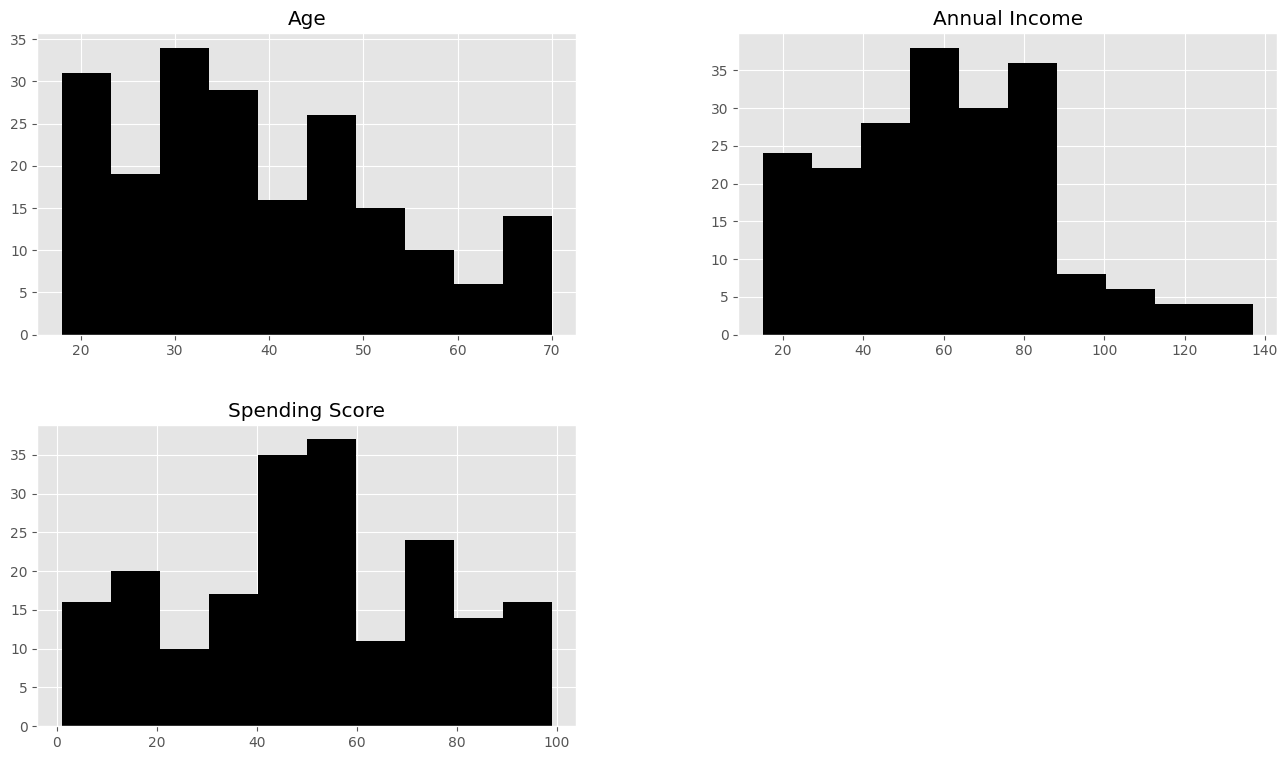

In [138]:
# Previamente hemos eliminado la columna CustomerID, ya que no aporta información relevante
dataframe.drop('CustomerID', axis = 1).hist(color = 'black')
plt.show()

Veamos también la correlación entre las variables.

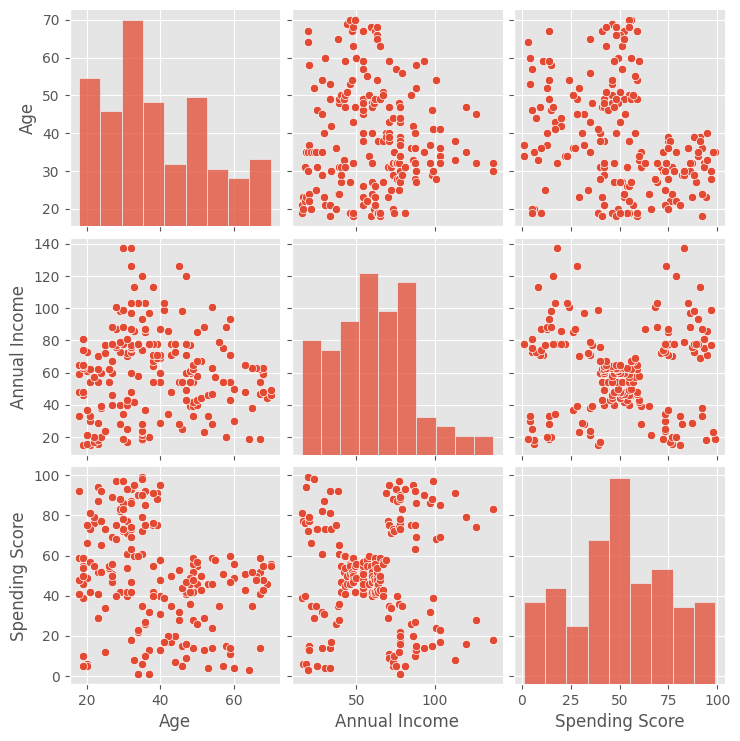

In [139]:
# Mostramos las relaciones entre los datos
sb.pairplot(dataframe.drop('CustomerID', axis = 1), height = 2.5)

## Tratamiento de los datos

Para esta primera aproximación, vamos a quitar la columna de `CustomerID`, ya que esta es solamente un identificador que nada aporta al estudio; y la columna de `Genre` ya que no la vamos a tener en cuenta en este primer estudio.

In [140]:
# Quitamos la columna de CustomerID
dataframe = dataframe.drop('CustomerID', axis = 1)
# Quitamos la columna de Genre
dataframe = dataframe.drop('Genre', axis = 1)
# Mostramos la base de datos con las columnas eliminadas
dataframe.head(10)

,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


Ahora comprobemos si existen outliers en los datos, haciendo uso de un diagrama de cajas, para observar si existen valores atípicos en los datos.

Text(0.5, 1.0, 'Diagrama de cajas de las variables')

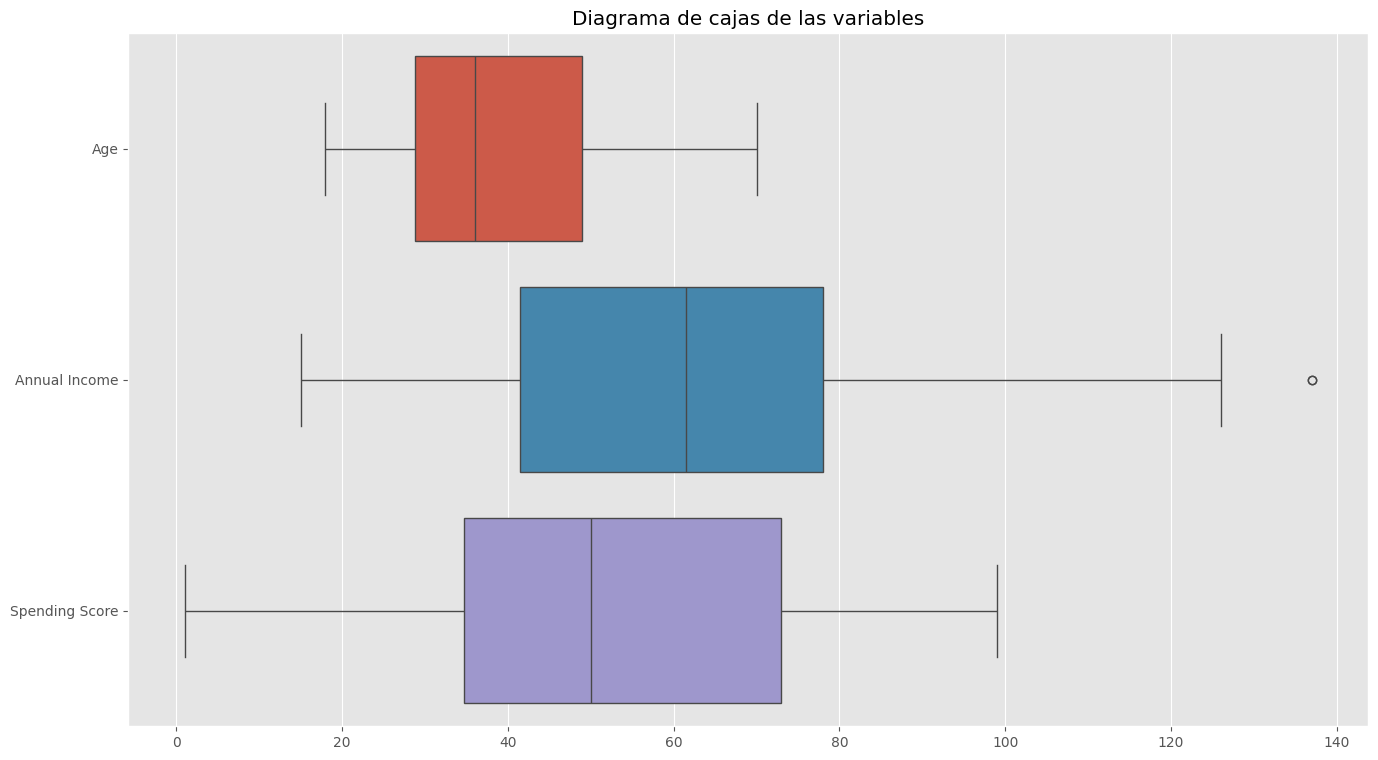

In [141]:
# Comprobamos si existen outliers
sb.boxplot(data = dataframe, orient = 'h').set_title("Diagrama de cajas de las variables")

Detectamos un outlier en la columna de `Annual Income`, por lo que vamos a proceder a eliminarlo.

In [142]:
dataframe[dataframe['Annual Income'] > 130]

,Age,Annual Income,Spending Score
198,32,137,18
199,30,137,83


In [112]:
# Quitamos los outliers detectados, puesto que suponen ruido en el análisis.
dataframe = dataframe[dataframe['Annual Income'] < 130]
dataframe.head(10)

,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


Una vez eliminado el outlier, vamos a normalizar los datos para que todas las variables tengan la misma importancia.

In [113]:
dataframe = (dataframe - dataframe.min()) / (dataframe.max() - dataframe.min())
dataframe.head()

,Age,Annual Income,Spending Score
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.009009,0.051020
3,0.096154,0.009009,0.775510
4,0.250000,0.018018,0.397959


Procedamos ahora a la estandarización de los datos, para que tengan una media de 0 y una desviación estándar de 1.

In [143]:
dataframe_mean = dataframe.mean()
dataframe_std = dataframe.std()
dataframe = (dataframe - dataframe_mean) / dataframe_std
dataframe.head()

,Age,Annual Income,Spending Score
0,-1.421003,-1.734646,-0.433713
1,-1.277829,-1.734646,1.192711
2,-1.349416,-1.696572,-1.711618
3,-1.134655,-1.696572,1.037814
4,-0.561958,-1.658498,-0.394989


## Agrupamiento (Clustering) de los datos

Una vez que tenemos los datos preparados, vamos a proceder a realizar el agrupamiento de los mismos.

Para ello, primero visualizaremos los datos en un gráfico 3D para ver si nos aporta alguna información.

In [291]:
import plotly.express as px
fig = px.scatter_3d(dataframe, x = 'Age', y = 'Annual Income', z = 'Spending Score')
fig.show()

## K-Means
Obtengamos el número óptimo de clusters haciendo uso del método del codo.

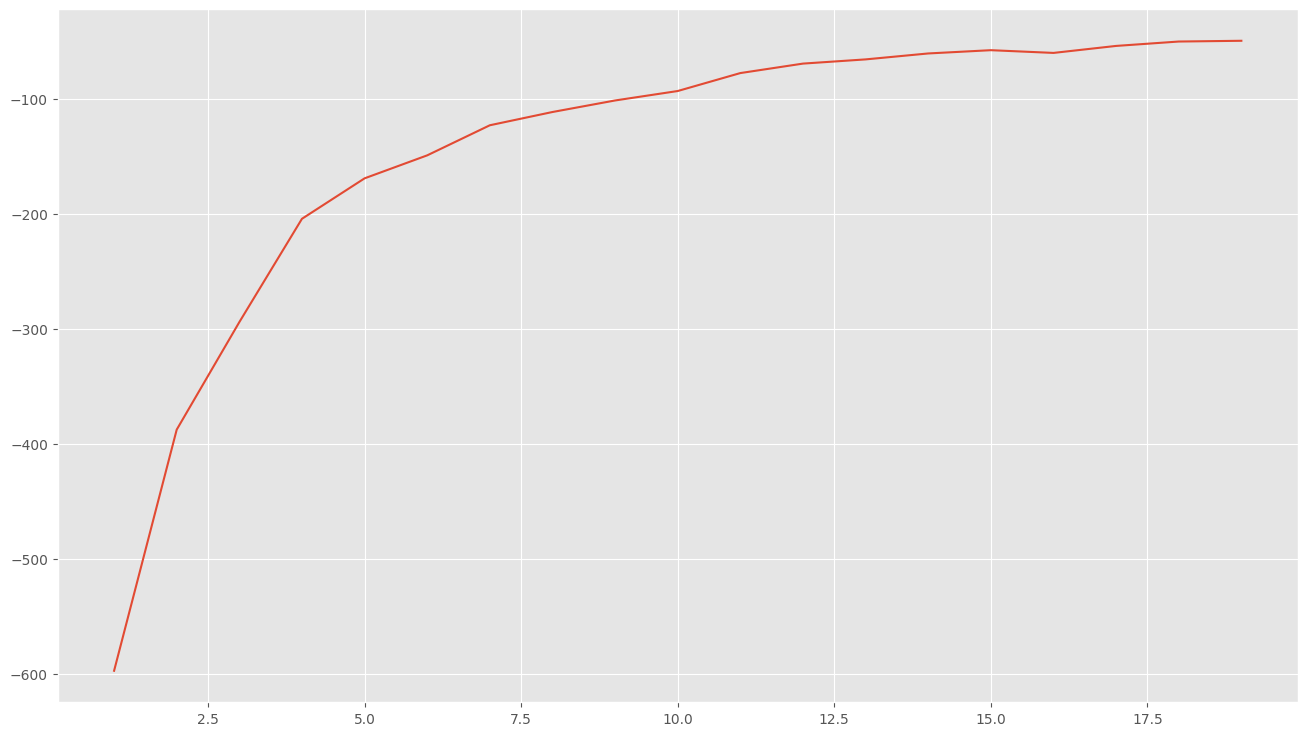

In [145]:
# Definimos el rango donde vamos a probar el algoritmo K-Means
clusters = range(1, 20)
kmeans = [KMeans(n_clusters = cluster) for cluster in clusters]
score = [kmeans[cluster].fit(dataframe).score(dataframe) for cluster in range(len(kmeans))]
# Mostramos 'el codo'
plt.plot(clusters, score)

En el gráfico del codo, podemos observar que el número óptimo de clusters es 6. Por tanto hagamos uso de este valor para realizar el agrupamiento usando el algoritmo de K-Means, y obteniendo los centroides de los clusters.

In [153]:
kmeans = KMeans(n_clusters = 6).fit(dataframe)
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.41878423  2.0618641   1.09313407]
 [-0.97195688 -1.32621729  1.12934389]
 [ 1.19562713 -0.45982751 -0.32621956]
 [ 0.22116059  1.08051381 -1.28682305]
 [-0.42963075  0.7413101   1.23847625]
 [-0.81175143 -0.39800982 -0.2549218 ]]


Deshacemos la estandarización de los datos para poder visualizar los clusters en un gráfico 3D.

In [154]:
for centroid in centroids:
  print(centroid * dataframe_std + dataframe_mean)

Age                33.000000
Annual Income     114.714286
Spending Score     78.428571
dtype: float64
Age               25.272727
Annual Income     25.727273
Spending Score    79.363636
dtype: float64
Age               55.551724
Annual Income     48.482759
Spending Score    41.775862
dtype: float64
Age               41.939394
Annual Income     88.939394
Spending Score    16.969697
dtype: float64
Age               32.848485
Annual Income     80.030303
Spending Score    82.181818
dtype: float64
Age               27.510638
Annual Income     50.106383
Spending Score    43.617021
dtype: float64


In [290]:
import plotly.graph_objects as go

dataframe['ClusterKMeans'] = kmeans.fit_predict(dataframe[['Age', 'Annual Income', 'Spending Score']])

# Definimos una lista de colores para los clusters
colours = ['blue', 'red', 'green', 'cyan', 'magenta', 'yellow']

figure = go.Figure()

for cluster in dataframe['ClusterKMeans'].unique():
  dataframe_cluster = dataframe[dataframe['ClusterKMeans'] == cluster]
  figure.add_trace(go.Scatter3d(
    x = dataframe_cluster['Age'], 
    y = dataframe_cluster['Annual Income'], 
    z = dataframe_cluster['Spending Score'], 
    mode = 'markers',
    marker = dict(size = 2.5, color = colours[cluster]),
    name = 'Cluster ' + str(cluster + 1)
  ))

figure.show()

## Dendogramas

A continuación realizamos dendogramas de distintos métodos de agrupamiento jerárquico, para ver si podemos obtener alguna información adicional.

### Método single

En este primer dendograma, lo haremos usando el método single.

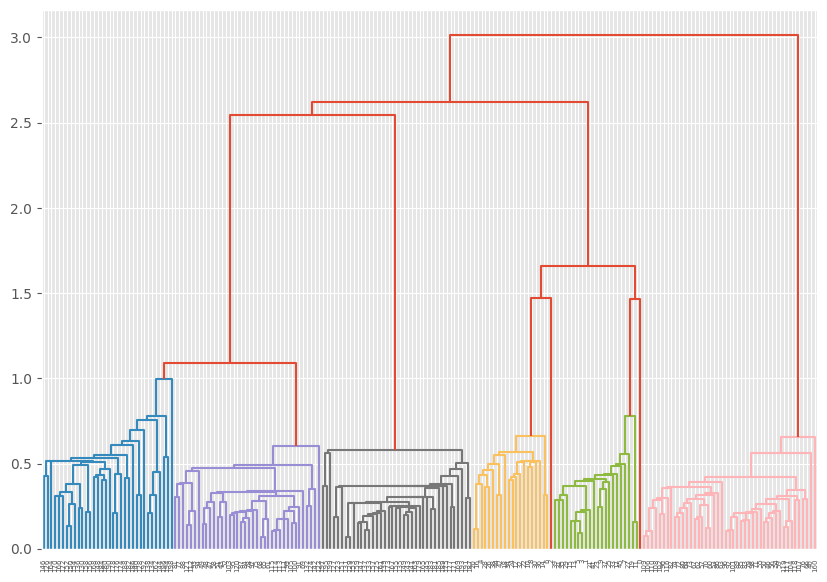

In [197]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linked = linkage(dataframe, 'single')

plt.figure(figsize = (10, 7))
dendrogram(linked,
           orientation = 'top',
           labels = dataframe.index,
           distance_sort = 'descending',
           show_leaf_counts = True,
           color_threshold = 1)

plt.show()

Para ver si la calidad del dendrograma es buena, vamos a calcular el coeficiente de correlación de Cophenetic.

In [198]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

cophonetic_coefficient, cophenetic_distances = cophenet(linked, pdist(dataframe))

print(cophonetic_coefficient)

0.8161318279815363


Como vemos obtenemos un coeficiente de correlación de 0.81, lo que indica que la calidad del dendrograma es buena.

In [289]:
from scipy.cluster.hierarchy import fcluster

clusters = 6

dataframe['ClustersSingle'] = fcluster(linked, clusters, criterion='maxclust')

colours = ['blue', 'red', 'green', 'cyan', 'magenta', 'yellow']

figure = go.Figure()

for cluster in dataframe['ClustersSingle'].unique():
  dataframe_cluster = dataframe[dataframe['ClustersSingle'] == cluster]
  figure.add_trace(go.Scatter3d(
    x = dataframe_cluster['Age'], 
    y = dataframe_cluster['Annual Income'], 
    z = dataframe_cluster['Spending Score'], 
    mode = 'markers',
    marker = dict(size = 2.5, color = colours[cluster % len(colours)]),
    name = 'Cluster ' + str(cluster)
  ))

figure.show()

### Método centroid

Realizamos el mismo procedimiento que en el caso anterior, pero esta vez con el método de centroid.

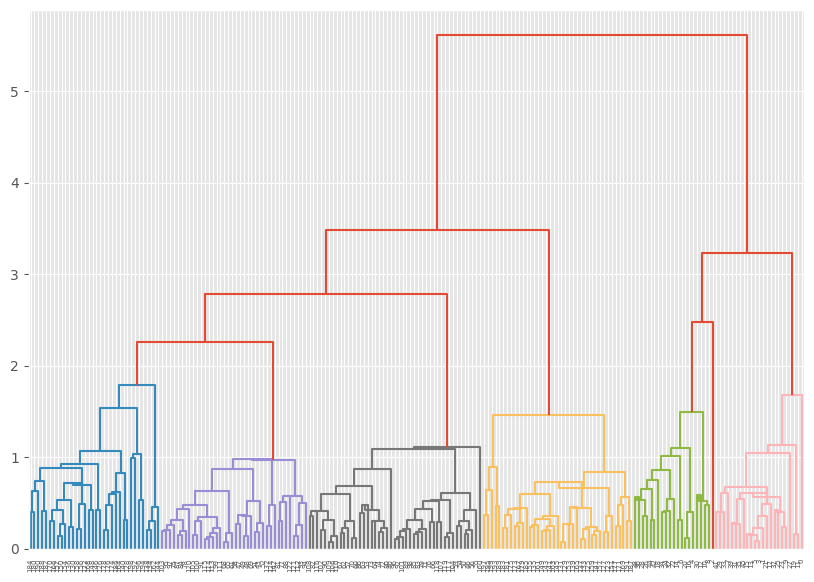

In [208]:
linked = linkage(dataframe, 'centroid')

plt.figure(figsize = (10, 7))
dendrogram(linked,
           orientation = 'top',
           labels = dataframe.index,
           distance_sort = 'descending',
           show_leaf_counts = True,
           color_threshold=2)
plt.show()

In [209]:
cophenetic_coefficient, cophenetic_distances = cophenet(linked, pdist(dataframe))
print(cophenetic_coefficient)

0.937682061671576


Usando este nuevo método, obtenemos un coeficiente de correlación de 0.87, lo que indica que la calidad del dendrograma es mejor que en el caso anterior.

In [288]:
from scipy.cluster.hierarchy import fcluster

clusters = 6

dataframe['ClustersCentroid'] = fcluster(linked, clusters, criterion='maxclust')

colours = ['blue', 'red', 'green', 'cyan', 'magenta', 'yellow']

figure = go.Figure()

for cluster in dataframe['ClustersCentroid'].unique():
  dataframe_cluster = dataframe[dataframe['ClustersCentroid'] == cluster]
  figure.add_trace(go.Scatter3d(
    x = dataframe_cluster['Age'], 
    y = dataframe_cluster['Annual Income'], 
    z = dataframe_cluster['Spending Score'], 
    mode = 'markers',
    marker = dict(size = 2.5, color = colours[cluster % len(colours)]),
    name = 'Cluster ' + str(cluster + 1)
  ))

figure.show()

### Método Ward
Finalmente, realizamos el mismo procedimiento que en los casos anteriores, pero esta vez con el método de Ward.

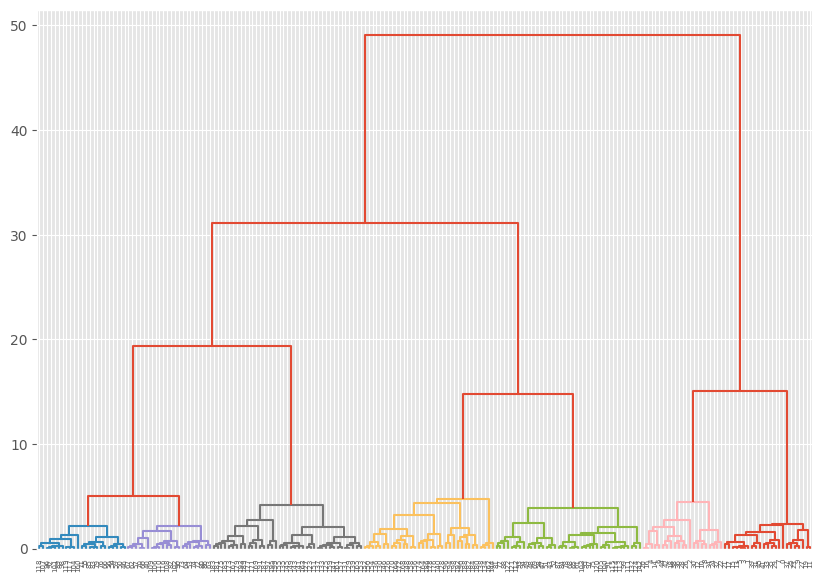

In [216]:
linked = linkage(dataframe, 'ward')

# Crea el dendrograma
plt.figure(figsize = (10, 7))
dendrogram(linked,
           orientation = 'top',
           labels = dataframe.index,
           distance_sort = 'descending',
           show_leaf_counts = True,
           color_threshold=5)
plt.show()

In [217]:
cophenetic_coefficient, cophenetic_distances = cophenet(linked, pdist(dataframe))
print(cophenetic_coefficient)

0.949977009398896


In [293]:
from scipy.cluster.hierarchy import fcluster

clusters = 6

dataframe['ClustersWard'] = fcluster(linked, clusters, criterion='maxclust')

colours = ['blue', 'red', 'green', 'cyan', 'magenta', 'yellow']

figure = go.Figure()

for cluster in dataframe['ClustersWard'].unique():
  dataframe_cluster = dataframe[dataframe['ClustersWard'] == cluster]
  figure.add_trace(go.Scatter3d(
    x = dataframe_cluster['Age'], 
    y = dataframe_cluster['Annual Income'], 
    z = dataframe_cluster['Spending Score'], 
    mode = 'markers',
    marker = dict(size = 2.5, color = colours[cluster % len(colours)]),
    name = 'Cluster ' + str(cluster + 1)
  ))

figure.show()

# Agrupamiento por género
En este caso, vamos a realizar el agrupamiento de los datos pero teniendo en cuenta el género de los clientes.

In [219]:
# Cargamos la base de datos nuevamente y realizamos el preprocesamiento de los datos
dataframe = pd.read_csv(r"dataframe/mallCustomers.csv")
dataframe = dataframe.drop('CustomerID', axis = 1)
dataframe.head(10)

,Genre,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


Creamos dos conjuntos de datos nuevos a partir de los que ya teniamos, uno para los hombres y otro para las mujeres.

In [220]:
dataframe_female = dataframe[dataframe['Genre'] == 'Female']
dataframe_female = dataframe_female.drop('Genre', axis = 1)
dataframe_male = dataframe[dataframe['Genre'] == 'Male']
dataframe_male = dataframe_male.drop('Genre', axis = 1)

Vamos ahora a eliminar los outliers de los datos de ambas agrupaciones, tal y como hicimos anteriormente.

In [221]:
dataframe_female = dataframe_female[dataframe_female['Annual Income'] < 130]
dataframe_male = dataframe_male[dataframe_male['Annual Income'] < 130]

Por otro lado, vamos a estandarizar los datos de ambos conjuntos, para que todas las variables tengan la misma importancia, como se realizó anteriormente.

In [222]:
dataframe_female_mean = dataframe_female.mean()
dataframe_female_std = dataframe_female.std()
dataframe_female = (dataframe_female - dataframe_female_mean) / dataframe_female_std

dataframe_male_mean = dataframe_male.mean()
dataframe_male_std = dataframe_male.std()
dataframe_male = (dataframe_male - dataframe_male_mean) / dataframe_male_std

Calculamos los centroides de los clusters para el conjunto de datos de las mujeres.

In [223]:
clusters = 6

kmeans_female = KMeans(clusters).fit(dataframe_female)
centroids_female = kmeans_female.cluster_centers_

# Deshacemos la estandarización, para mostrar los resultados en la escala original
for each in centroids_female:
  print(each * dataframe_female_std + dataframe_female_mean)

Age               25.461538
Annual Income     25.692308
Spending Score    80.538462
dtype: float64
Age               43.785714
Annual Income     93.285714
Spending Score    20.642857
dtype: float64
Age               32.190476
Annual Income     86.047619
Spending Score    81.666667
dtype: float64
Age               54.153846
Annual Income     54.230769
Spending Score    48.961538
dtype: float64
Age               41.538462
Annual Income     26.538462
Spending Score    20.692308
dtype: float64
Age               27.96
Annual Income     57.36
Spending Score    47.12
dtype: float64


A continuación, vamos a mostrar los centroides de los clusters obtenidos en el caso de las mujeres.

In [ ]:
import plotly.graph_objects as go

dataframe_female['ClustersFemale'] = kmeans.fit_predict(dataframe_female[['Age', 'Annual Income', 'Spending Score']])

colours = ['blue', 'red', 'green', 'cyan', 'magenta', 'yellow']

figure_female = go.Figure()

for cluster in dataframe_female['ClustersFemale'].unique():
  df_cluster = dataframe_female[dataframe_female['ClustersFemale'] == cluster]
  figure_female.add_trace(go.Scatter3d(
    x = df_cluster['Age'], 
    y = df_cluster['Annual Income'], 
    z = df_cluster['Spending Score'], 
    mode = 'markers',
    marker = dict(size = 2.5, color = colours[cluster]),
    name = 'Cluster ' + str(cluster + 1)
  ))

# Añadimos los centroides de cada cluster al gráfico
figure_female.add_trace(go.Scatter3d(
  x = centroids_female[:, 0], 
  y = centroids_female[:, 1], 
  z = centroids_female[:, 2], 
  mode = 'markers',
  marker = dict(size = 3.5, color = 'black'),
  name = 'Centroids'
))

figure_female.show()

Realizamos el mismo procedimiento que en el caso anterior, pero esta vez para el conjunto de datos de los hombres.

In [267]:
clusters = 6

kmeans_male = KMeans(clusters).fit(dataframe_male)
centroids_male = kmeans_male.cluster_centers_

# Deshacemos la estandarización, para mostrar los resultados en la escala original
for each in centroids_male:
  print(each * dataframe_male_std + dataframe_male_mean)

Age               33.5625
Annual Income     81.5625
Spending Score    83.1875
dtype: float64
Age               58.84
Annual Income     47.80
Spending Score    41.00
dtype: float64
Age                32.5
Annual Income     119.5
Spending Score     41.0
dtype: float64
Age               40.277778
Annual Income     80.722222
Spending Score    14.166667
dtype: float64
Age               26.846154
Annual Income     25.615385
Spending Score    65.076923
dtype: float64
Age               24.500000
Annual Income     56.416667
Spending Score    52.416667
dtype: float64


In [ ]:
import plotly.graph_objects as go

dataframe_male['ClusterMale'] = kmeans.fit_predict(dataframe_male[['Age', 'Annual Income', 'Spending Score']])

colours = ['blue', 'red', 'green', 'cyan', 'magenta', 'yellow']

figure_male = go.Figure()

for cluster in dataframe_male['ClusterMale'].unique():
  dataframe_cluster = dataframe_male[dataframe_male['ClusterMale'] == cluster]
  figure_male.add_trace(go.Scatter3d(
    x = dataframe_cluster['Age'], 
    y = dataframe_cluster['Annual Income'], 
    z = dataframe_cluster['Spending Score'], 
    mode = 'markers',
    marker = dict(size = 3, color = colours[cluster]),
    name = 'Cluster ' + str(cluster + 1)
  ))

# Añadimos los centroides de cada cluster al gráfico
figure_male.add_trace(go.Scatter3d(
  x = centroids_male[:, 0], 
  y = centroids_male[:, 1], 
  z = centroids_male[:, 2], 
  mode = 'markers',
  marker = dict(size = 3.5, color = 'black'),
  name = 'Centroids'
))

figure_male.show()